# Visualizing medical data with Python

In this notebook, we will visualize medical data using Python. We will use the following libraries:

- `pandas` for data manipulation
- `matplotlib` for data visualization
- `seaborn` for data visualization
- numpy for numerical operations

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm


In [2]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

In [5]:
# Hard-coded risk factor thresholds (can be changed for different scenarios)
WEIGHT_THRESHOLD = 85
BLOOD_PRESSURE_THRESHOLD = 140
CHOLESTEROL_THRESHOLD = 240

# Hard-coded weights for risk factors (can be adjusted based on importance)
AGE_WEIGHT = 2
WEIGHT_WEIGHT = 3
BLOOD_PRESSURE_WEIGHT = 2
CHOLESTEROL_WEIGHT = 4
SMOKER_WEIGHT = 3
EXERCISE_MODIFIER = 2  # Divides risk score by 2 for exercise

# Generate base distributions
np.random.seed(42)
age = np.random.randint(18, 80, size=100)
height = np.random.normal(165, 10, size=100)
weight = np.random.normal(70, 15, size=100)
blood_pressure = np.random.normal(120, 15, size=100)
cholesterol = np.random.normal(200, 50, size=100)
smoker = np.random.choice([0, 1], size=100)
exercise = np.random.choice([0, 1, 2], size=100)

# Adjust data for heart disease risk factors
heart_disease = np.zeros(100)

for i in range(100):
    risk_score = 0
    # Assign points based on hard-coded thresholds and weights
    if age[i] > 50:
        risk_score += AGE_WEIGHT
    if weight[i] > WEIGHT_THRESHOLD:
        risk_score += WEIGHT_WEIGHT
    if blood_pressure[i] > BLOOD_PRESSURE_THRESHOLD:
        risk_score += BLOOD_PRESSURE_WEIGHT
    if cholesterol[i] > CHOLESTEROL_THRESHOLD:
        risk_score += CHOLESTEROL_WEIGHT
    if smoker[i] == 1:
        risk_score += SMOKER_WEIGHT
    if exercise[i] == 0:
        risk_score += 4
    elif exercise[i] == 1:
        risk_score /= EXERCISE_MODIFIER

    # Convert risk score to heart disease probability with randomness
    heart_disease_probability = 1 / (1 + np.exp(-risk_score / 3))  # Sigmoid function for probability
    heart_disease[i] = np.random.choice([0, 1], p=[1 - heart_disease_probability, heart_disease_probability])

data = {
    "Age": age,
    "Height": height,
    "Weight": weight,
    "Blood_Pressure": blood_pressure,
    "Cholesterol": cholesterol,
    "Smoker": smoker,
    "Exercise": exercise,
    "Heart_Disease": heart_disease,
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("medical_research_data.csv", index=False)

df.head(20)


,Age,Height,Weight,Blood_Pressure,Cholesterol,Smoker,Exercise,Heart_Disease
0,56,171.983989,63.357965,125.316294,244.449215,0,1,0.0
1,69,163.283712,75.673399,91.795311,224.803212,0,1,1.0
2,46,155.928134,99.007597,134.495880,202.778608,0,0,0.0
3,32,176.886257,71.214562,112.335833,203.011646,0,1,1.0
4,60,172.855321,63.753155,138.155979,128.026920,0,1,0.0
5,25,191.560101,82.862549,117.731461,180.825624,0,0,0.0
6,78,167.634860,80.771924,114.382177,244.310098,1,2,1.0
7,38,181.417711,55.727924,100.631758,188.314841,1,0,1.0
8,56,169.608163,61.957598,108.517360,202.217528,0,1,1.0
9,75,165.859235,86.447933,126.334706,141.193626,0,0,1.0


In [6]:
# Summary statistics
df.describe()

,Age,Height,Weight,Blood_Pressure,Cholesterol,Smoker,Exercise,Heart_Disease
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.270000,165.209837,69.034214,120.550888,195.718979,0.490000,1.020000,0.800000
std,19.176403,9.865592,15.716762,17.335841,48.371075,0.502418,0.803779,0.402015
min,19.000000,140.012409,26.808147,69.538567,77.040332,0.000000,0.000000,0.000000
25%,34.750000,157.935226,57.823321,109.829057,162.607892,0.000000,0.000000,1.000000
50%,51.500000,164.753713,70.568939,121.426004,192.321287,0.000000,1.000000,1.000000
75%,68.000000,172.091116,78.519535,132.923433,237.013649,1.000000,2.000000,1.000000
max,79.000000,191.560101,104.100177,167.805500,293.038903,1.000000,2.000000,1.000000


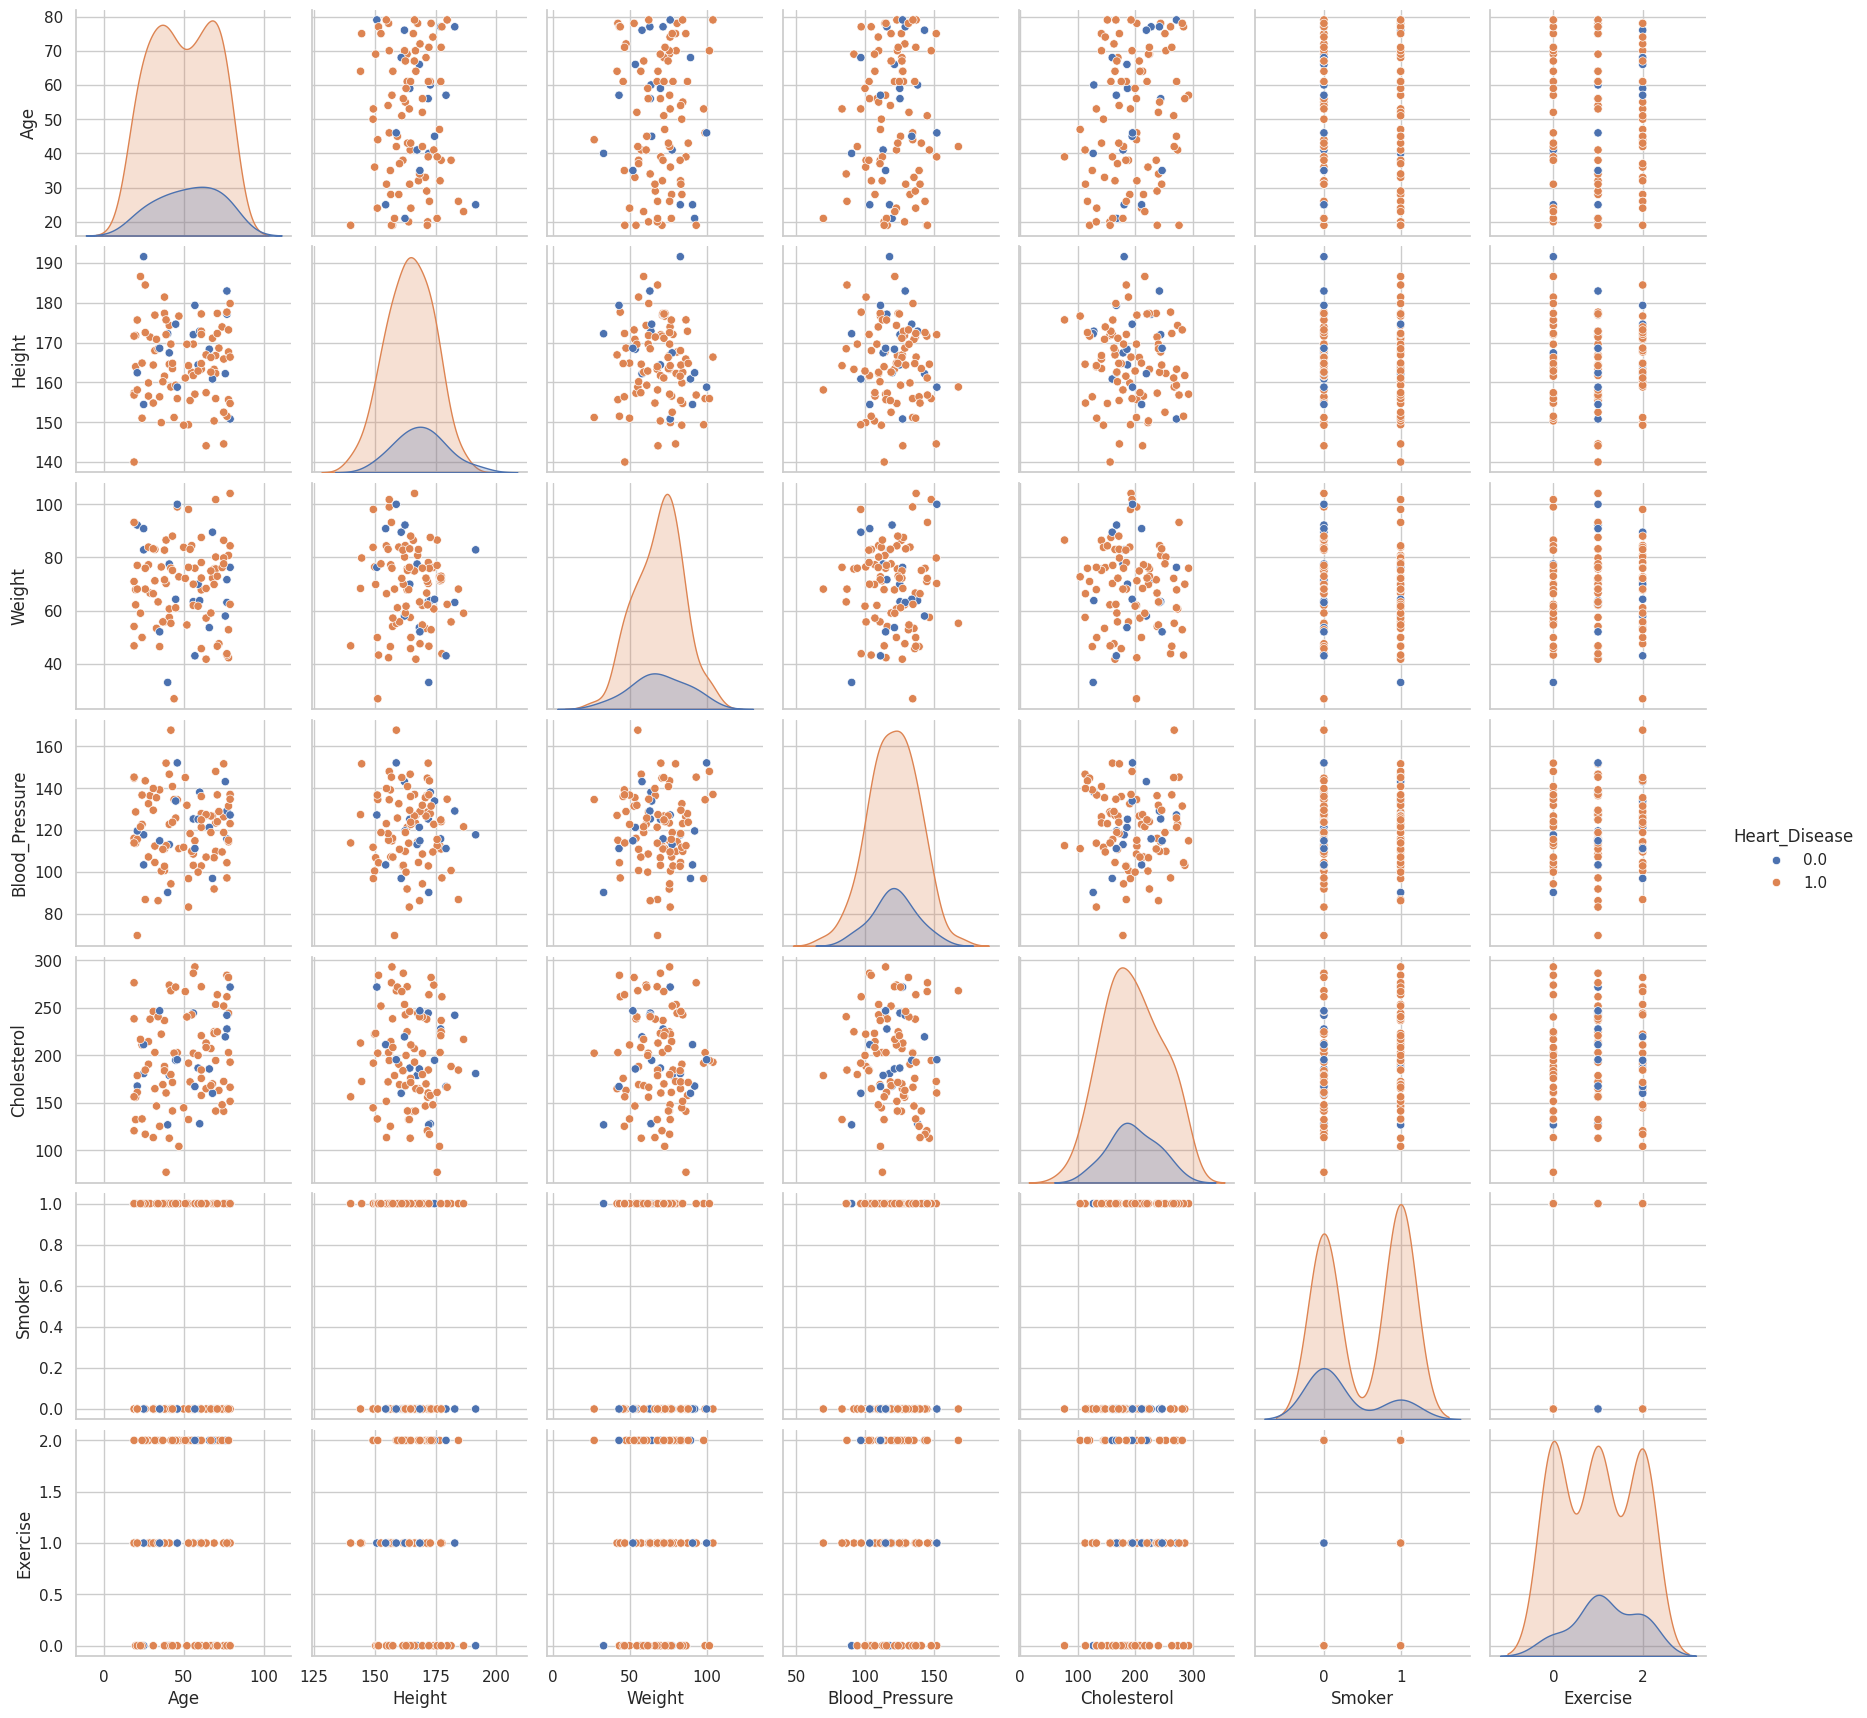

In [48]:
%matplotlib inline

# Pairplot to visualize relationships between variables
sns.pairplot(df, hue="Heart_Disease")
plt.show()


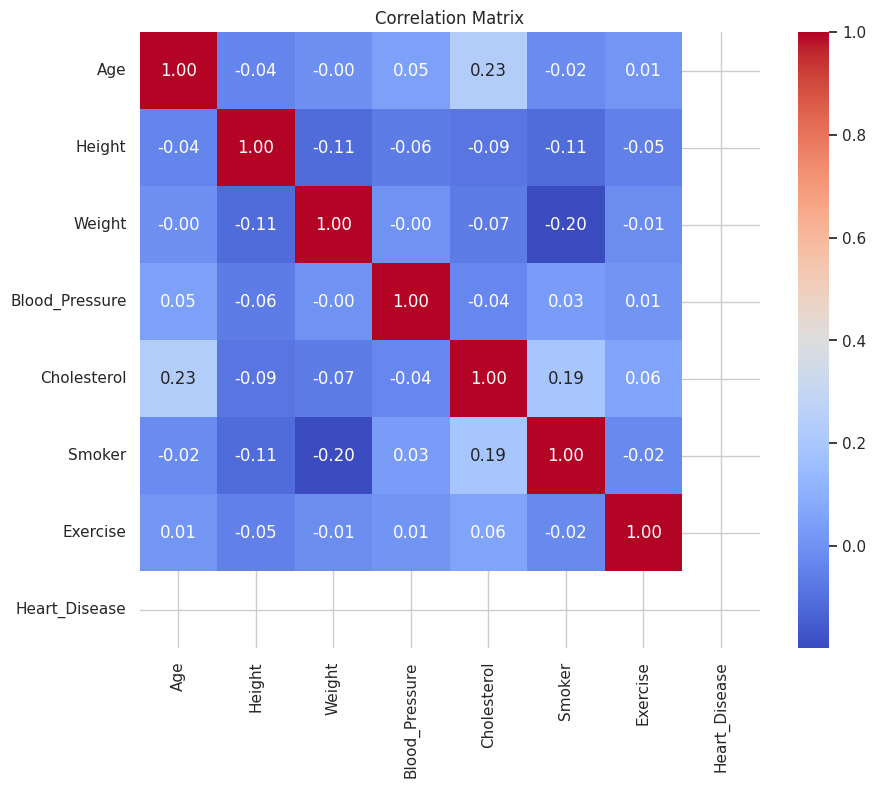

In [40]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

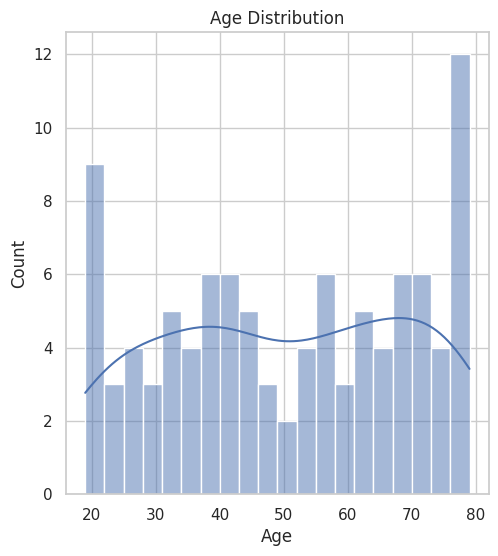

In [49]:
# Distribution of Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Age Distribution")

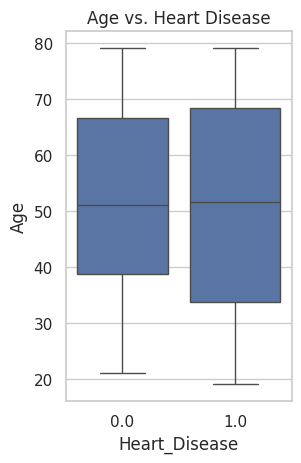

In [7]:
# Boxplot of Age by Heart Disease status
plt.subplot(1, 2, 2)
sns.boxplot(x="Heart_Disease", y="Age", data=df)
plt.title("Age vs. Heart Disease")
plt.show()

Text(0.5, 1.0, 'Height vs. Weight')

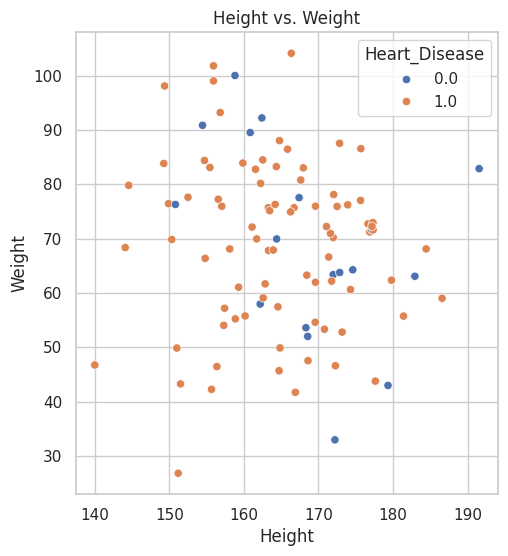

In [50]:

# Scatter plot of Height vs. Weight
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="Height", y="Weight", hue="Heart_Disease", data=df)
plt.title("Height vs. Weight")

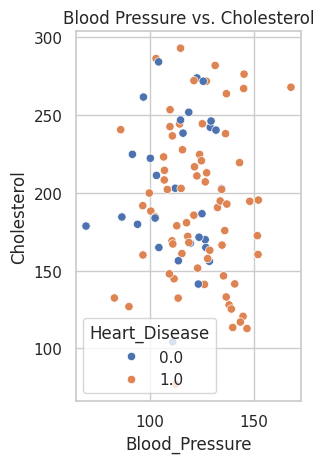

In [19]:
# Scatter plot of Blood Pressure vs. Cholesterol
plt.subplot(1, 2, 2)
sns.scatterplot(x="Blood_Pressure", y="Cholesterol", hue="Heart_Disease", data=df)
plt.title("Blood Pressure vs. Cholesterol")
plt.show()

Text(0.5, 1.0, 'Smokers vs. Non-Smokers')

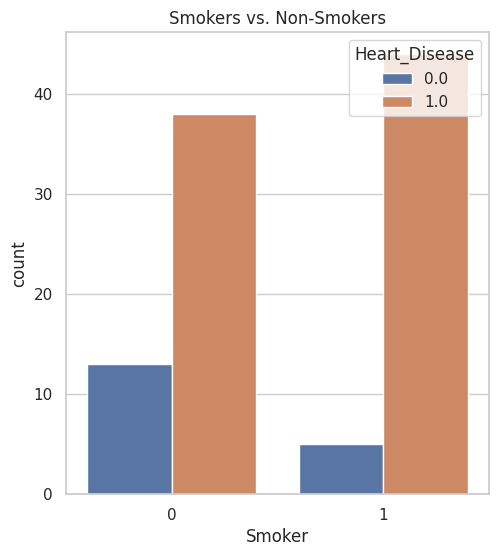

In [51]:

# Count plot of Smokers vs. Non-Smokers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Smoker", hue="Heart_Disease", data=df)
plt.title("Smokers vs. Non-Smokers")

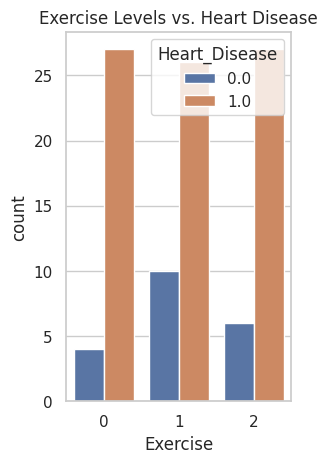

In [8]:
# Count plot of Exercise levels
plt.subplot(1, 2, 2)
sns.countplot(x="Exercise", hue="Heart_Disease", data=df)
plt.title("Exercise Levels vs. Heart Disease")
plt.show()

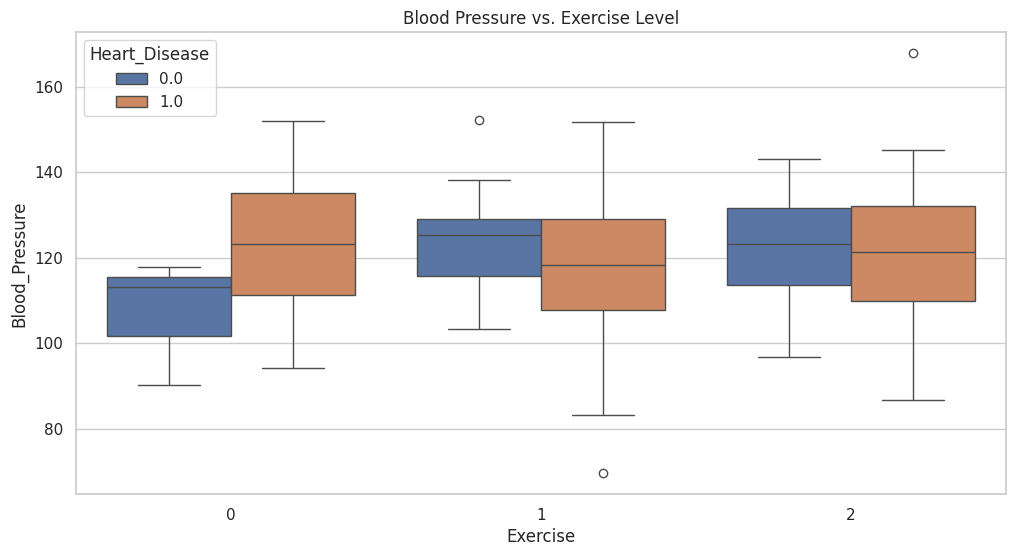

In [52]:
# Boxplot of Blood Pressure by Exercise level
plt.figure(figsize=(12, 6))
sns.boxplot(x="Exercise", y="Blood_Pressure", hue="Heart_Disease", data=df)
plt.title("Blood Pressure vs. Exercise Level")
plt.show()
